In this Pokemon Classifcaition Project the model that I preffered is the K-NN model.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns

In [12]:
# get the data
poke_df = pd.read_csv('pokemon_gold_stats.csv', index_col=None, sep=';')
poke_df

,Rank,Pokemon,Overall,HP,Atk,Def,SA,SD,Spd
0,1,Ho-oh,2053,415,358,278,318,406,278
1,2,Lugia,2053,415,278,358,278,406,318
2,3,Mewtwo,2053,415,318,278,406,278,358
3,4,Celebi,1893,403,298,298,298,298,298
4,5,Dragonite,1893,385,366,288,298,298,258
...,...,...,...,...,...,...,...,...,...
246,247,Pichu,1103,243,178,128,168,168,218
247,248,Magikarp,1093,243,118,208,128,138,258
248,249,Caterpie,1083,293,158,168,138,138,188
249,250,Weedle,1083,283,168,158,138,138,198


In [26]:
# this dataset has own special corrections so I'm gonna change the Overall score column to categorical vars (this is a special code part that come with the dataset so this cell is not mine)
def ranking(x):
    if x in range(1001, 1350):
        return 'Common'
    if x in range(1351, 1700):
        return 'Uncommon'
    if x in range(1701, 2000):
        return 'Rare'
    if x >= 2001:
        return 'Legendary'

poke_df['Rating'] = poke_df['Overall'].apply(lambda x : ranking(x))
poke_df = poke_df.drop('Rank', axis=1)
poke_df

,Pokemon,Overall,HP,Atk,Def,SA,SD,Spd,Rating
0,Ho-oh,2053,415,358,278,318,406,278,Legendary
1,Lugia,2053,415,278,358,278,406,318,Legendary
2,Mewtwo,2053,415,318,278,406,278,358,Legendary
3,Celebi,1893,403,298,298,298,298,298,Rare
4,Dragonite,1893,385,366,288,298,298,258,Rare
...,...,...,...,...,...,...,...,...,...
246,Pichu,1103,243,178,128,168,168,218,Common
247,Magikarp,1093,243,118,208,128,138,258,Common
248,Caterpie,1083,293,158,168,138,138,188,Common
249,Weedle,1083,283,168,158,138,138,198,Common


In [27]:
# explore the data
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pokemon  251 non-null    object
 1   Overall  251 non-null    int64 
 2   HP       251 non-null    int64 
 3   Atk      251 non-null    int64 
 4   Def      251 non-null    int64 
 5   SA       251 non-null    int64 
 6   SD       251 non-null    int64 
 7   Spd      251 non-null    int64 
 8   Rating   251 non-null    object
dtypes: int64(7), object(2)
memory usage: 17.8+ KB


In [28]:
poke_df.describe()

,Overall,HP,Atk,Def,SA,SD,Spd
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,1504.928287,336.498008,239.282869,235.219124,229.617530,234.597610,229.713147
std,208.746149,59.594522,54.370835,60.802334,54.396591,54.856407,54.081840
min,1053.000000,223.000000,108.000000,108.000000,118.000000,138.000000,108.000000
25%,1333.000000,301.000000,198.000000,197.000000,188.000000,198.000000,188.000000
50%,1513.000000,333.000000,238.000000,228.000000,228.000000,228.000000,228.000000
75%,1673.000000,363.000000,273.000000,268.000000,268.000000,268.000000,268.000000
max,2053.000000,713.000000,366.000000,558.000000,406.000000,558.000000,378.000000


In [29]:
poke_df.shape

(251, 9)

In [30]:
poke_df.isna().sum()

Pokemon    0
Overall    0
HP         0
Atk        0
Def        0
SA         0
SD         0
Spd        0
Rating     0
dtype: int64

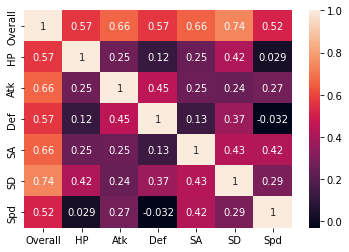

In [31]:
# visualize the explorization
sns.heatmap(poke_df.corr(), annot=True)

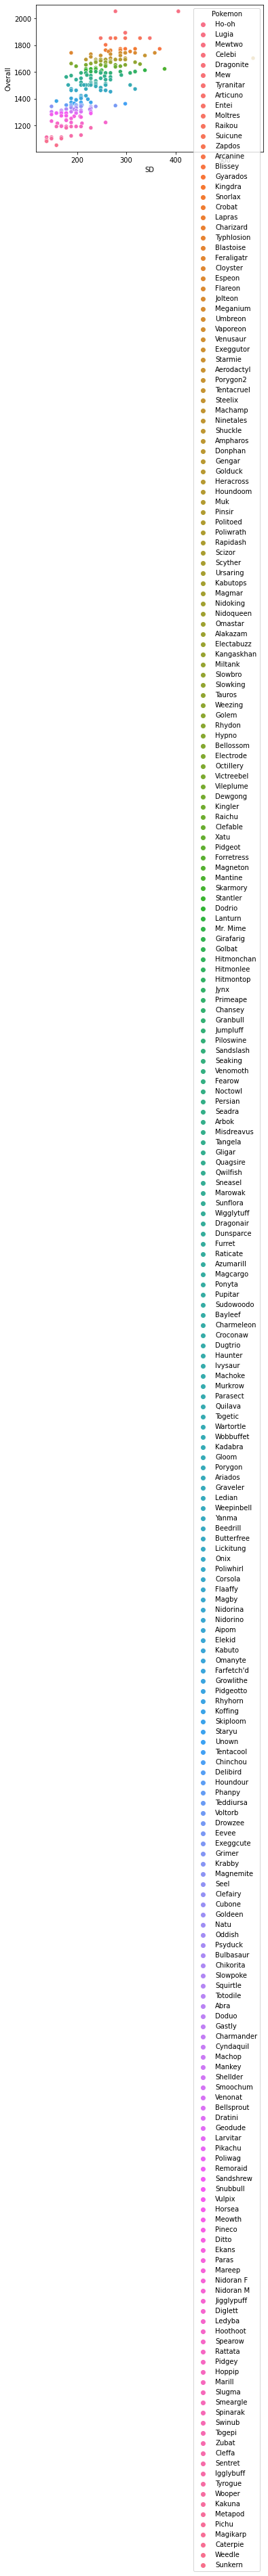

In [32]:
sns.scatterplot(x='SD', y='Overall', data=poke_df, hue='Pokemon') # there are many pokemons so this plot is not clear but we can still gain information

In [35]:
poke_df.groupby('Pokemon')['Rating'].sum()

Pokemon
Abra            Common
Aerodactyl        Rare
Aipom         Uncommon
Alakazam      Uncommon
Ampharos      Uncommon
                ...   
Wooper          Common
Xatu          Uncommon
Yanma         Uncommon
Zapdos            Rare
Zubat           Common
Name: Rating, Length: 251, dtype: object

In [36]:
poke_df

,Pokemon,Overall,HP,Atk,Def,SA,SD,Spd,Rating
0,Ho-oh,2053,415,358,278,318,406,278,Legendary
1,Lugia,2053,415,278,358,278,406,318,Legendary
2,Mewtwo,2053,415,318,278,406,278,358,Legendary
3,Celebi,1893,403,298,298,298,298,298,Rare
4,Dragonite,1893,385,366,288,298,298,258,Rare
...,...,...,...,...,...,...,...,...,...
246,Pichu,1103,243,178,128,168,168,218,Common
247,Magikarp,1093,243,118,208,128,138,258,Common
248,Caterpie,1083,293,158,168,138,138,188,Common
249,Weedle,1083,283,168,158,138,138,198,Common


In [37]:
# split the data
X = poke_df.drop(['Pokemon', 'Rating'], axis=1)
y = poke_df['Rating']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
# scale the data

from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

X_train = scl.fit_transform(X_train)
X_test = scl.fit_transform(X_test)

In [42]:
# generate the knn model 

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# don't know how to choose n_neighbors= value so just use a loop

acc = []
for i in range(1, 20):
  knnm = KNeighborsClassifier(n_neighbors=i)
  knnm.fit(X_train, y_train)
  pred_i = knnm.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, pred_i))

acc

[0.8795180722891566,
 0.8674698795180723,
 0.9036144578313253,
 0.891566265060241,
 0.8554216867469879,
 0.8795180722891566,
 0.8433734939759037,
 0.8674698795180723,
 0.8674698795180723,
 0.891566265060241,
 0.8674698795180723,
 0.891566265060241,
 0.8674698795180723,
 0.8795180722891566,
 0.8433734939759037,
 0.8554216867469879,
 0.8554216867469879,
 0.8313253012048193,
 0.8433734939759037]

In [43]:
# we got the best accuracy with the n_neighbour is 3 so let's use it
knnm = KNeighborsClassifier(n_neighbors=3)
knnm.fit(X_train, y_train)
preds = knnm.predict(X_test)
print(metrics.accuracy_score(y_test, preds))

0.9036144578313253


In [44]:
# confusion matrix
metrics.confusion_matrix(y_test, preds)

array([[26,  0,  1],
       [ 0,  9,  5],
       [ 1,  1, 40]])

Result: Accuracy score is high not that bad but we can develop the model more. I think we have issues because of unsufficient feature engineering.